In [ ]:
from model_utils import predict_sentiment
import pandas as pd

In [26]:
test = pd.read_csv("test.tsv", sep="\t")

In [27]:
test["Phrase"] = test["Phrase"].fillna("")

In [28]:
sentiment_map = {
    'Very Positive': 4,
    'Positive': 3,
    'Neutral': 2,
    'Negative': 1,
    'Very Negative': 0
}

In [29]:
test

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [52]:
submission = test["PhraseId"].copy().to_frame()

In [31]:
predict_sentiment(test.loc[1,"Phrase"], "./best_model")["sentiment"]

'Neutral'

In [32]:
from model_utils import batch_predict # Make sure to import the new function

# Assuming 'test["Phrase"]' is a pandas Series or list of texts
phrases = test["Phrase"].tolist() # Convert to list if it's a Series

# Predict in batches
predictions_list = batch_predict(phrases, model_path="./best_model")

# Extract just the sentiment if needed, or work with the full dictionaries
sentiments = [p.get("sentiment") for p in predictions_list]

# You can then assign this back to your DataFrame if desired
# test['predicted_sentiment_batch'] = sentiments

In [54]:
submission["Sentiment"] = sentiments

In [57]:
submission["Sentiment"].replace(sentiment_map, inplace=True)

C:\Users\osman\AppData\Local\Temp\ipykernel_12932\179812504.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  submission["Sentiment"].replace(sentiment_map, inplace=True)


C:\Users\osman\AppData\Local\Temp\ipykernel_12932\2107970938.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=submission, x='Sentiment', order=submission['Sentiment'].value_counts().sort_index().index, palette='viridis')


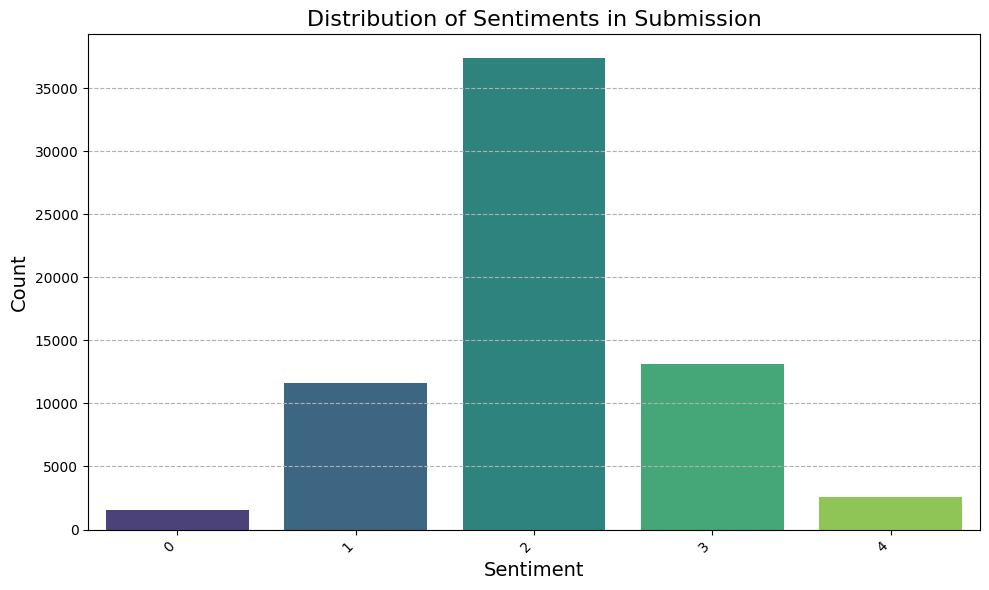

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'submission' DataFrame and 'Sentiment' column exist
plt.figure(figsize=(10, 6))
sns.countplot(data=submission, x='Sentiment', order=submission['Sentiment'].value_counts().sort_index().index, palette='viridis')
plt.title('Distribution of Sentiments in Submission', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
test["Phrase"] = test["Phrase"].fillna("")

In [64]:
submission.to_csv('submission.csv', index=False)